In [123]:
!pip install plotly==3.8.1
!pip install cufflinks

  Using cached plotly-3.8.1-py2.py3-none-any.whl (41.2 MB)
  Attempting uninstall: plotly
    Found existing installation: plotly 5.1.0
    Uninstalling plotly-5.1.0:
      Successfully uninstalled plotly-5.1.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cufflinks 0.17.3 requires plotly>=4.1.1, but you have plotly 3.8.1 which is incompatible.


  Using cached plotly-5.1.0-py2.py3-none-any.whl (20.6 MB)
  Attempting uninstall: plotly
    Found existing installation: plotly 3.8.1
    Uninstalling plotly-3.8.1:
      Successfully uninstalled plotly-3.8.1


In [124]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from plotly.offline import iplot
from sklearn.preprocessing import MinMaxScaler
import plotly.graph_objs as go
import plotly.figure_factory as ff

plt.rcParams['font.family'] = 'NanumGothic'

In [125]:
df = pd.read_csv('전처리_최종.csv', encoding='euc-kr')
df_sample = df.loc[:, ['업무건물','영업건물','타슈이용량','기타건물']]

In [126]:
df_sample2 = df.loc[:, ['주거건물','대중집합건물','대전지하철역', '타슈이용량']]

In [127]:
df_sample3 = df.loc[:, ['사고량', '정류장개수', '타슈이용량','총이용승객']]

In [128]:
colnames = df_sample.columns
scaler = MinMaxScaler()
scaler.fit(df_sample)

MinMaxScaler()

In [129]:
print(scaler.transform(df_sample))
new_colnames = [i+'_mms' for i in colnames]

[[0.         0.         0.14097283 0.        ]
 [0.02272727 0.         0.1963982  0.        ]
 [0.         0.         1.         0.        ]
 ...
 [0.02272727 0.38920455 0.07933028 0.31578947]
 [0.         0.01136364 0.03021656 0.        ]
 [0.         0.08522727 0.02184512 0.        ]]


In [130]:
pd.concat([df_sample, pd.DataFrame(scaler.fit_transform(df_sample[colnames]), columns=new_colnames)], axis=1)

,업무건물,영업건물,타슈이용량,기타건물,업무건물_mms,영업건물_mms,타슈이용량_mms,기타건물_mms
0,1,1,7727,1,0.000000,0.000000,0.140973,0.000000
1,2,1,10660,1,0.022727,0.000000,0.196398,0.000000
2,1,1,53185,1,0.000000,0.000000,1.000000,0.000000
3,13,38,11007,1,0.272727,0.105114,0.202956,0.000000
4,1,1,9109,1,0.000000,0.000000,0.167089,0.000000
...,...,...,...,...,...,...,...,...
257,12,1,2199,1,0.250000,0.000000,0.036509,0.000000
258,8,1,3210,1,0.159091,0.000000,0.055614,0.000000
259,2,138,4465,25,0.022727,0.389205,0.079330,0.315789
260,1,5,1866,1,0.000000,0.011364,0.030217,0.000000


In [131]:
df_sample.dropna(inplace=True)
df_sample

,업무건물,영업건물,타슈이용량,기타건물
0,1,1,7727,1
1,2,1,10660,1
2,1,1,53185,1
3,13,38,11007,1
4,1,1,9109,1
...,...,...,...,...
257,12,1,2199,1
258,8,1,3210,1
259,2,138,4465,25
260,1,5,1866,1


##### 공분산(두 변수 간 편차 곱의 평균)

In [132]:
df_sample.cov()

,업무건물,영업건물,타슈이용량,기타건물
업무건물,54.537408,90.070486,5.336984e+03,-4.179960
영업건물,90.070486,3113.625925,-2.770693e+04,115.054927
타슈이용량,5336.984148,-27706.929163,2.679940e+07,-6809.210289
기타건물,-4.179960,115.054927,-6.809210e+03,80.393261


##### 상관분석

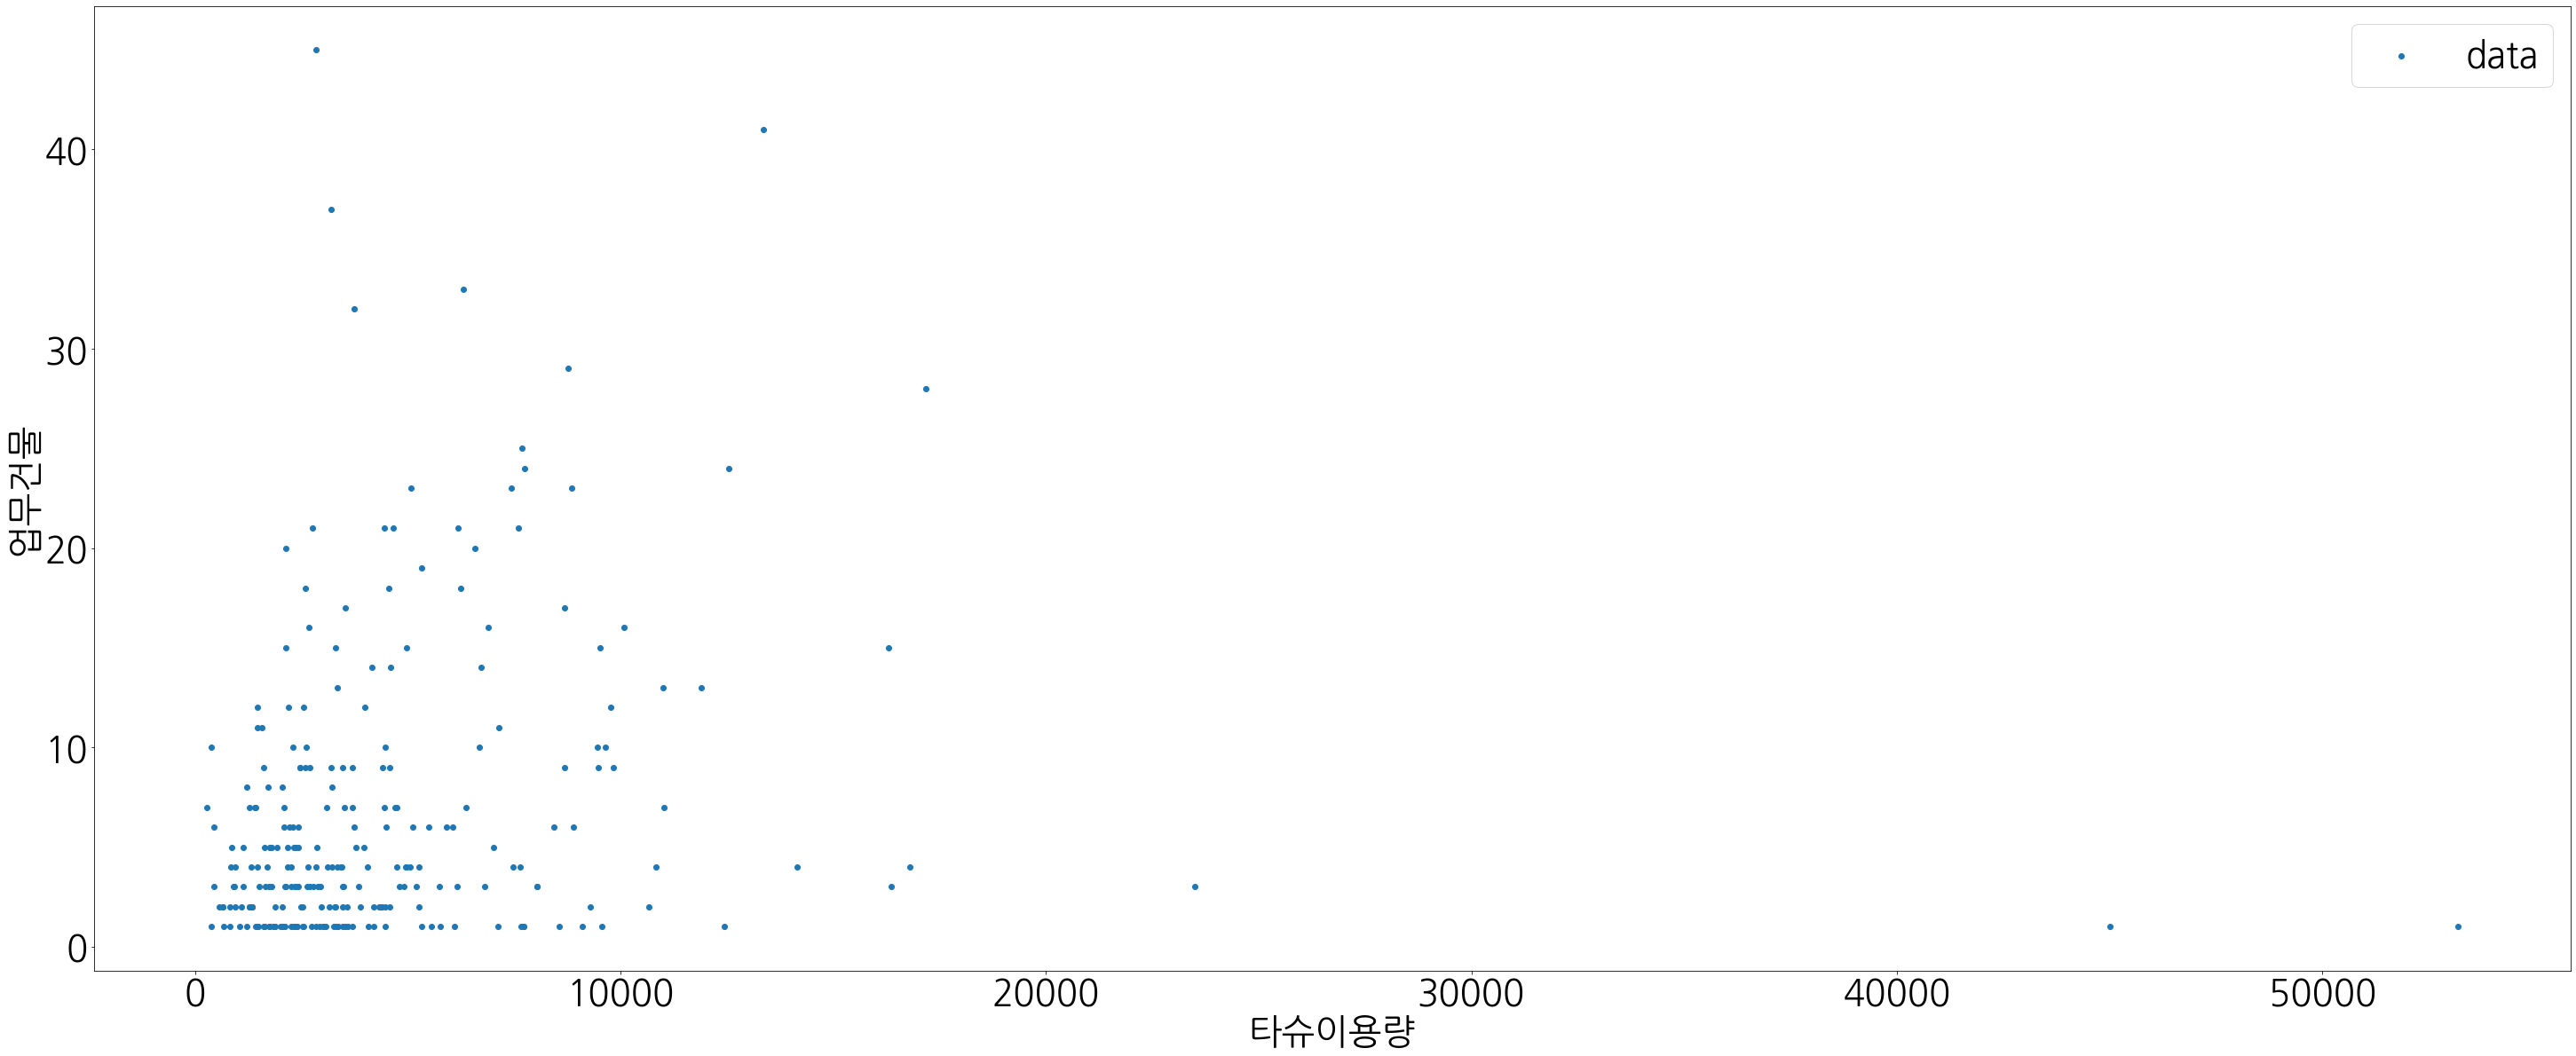

In [133]:
plt.scatter(df_sample['타슈이용량'], df_sample['업무건물'], label='data')
plt.rcParams["figure.figsize"] = (50, 20)
plt.legend(loc = "best")
plt.xlabel('타슈이용량')
plt.ylabel('업무건물')
plt.show()

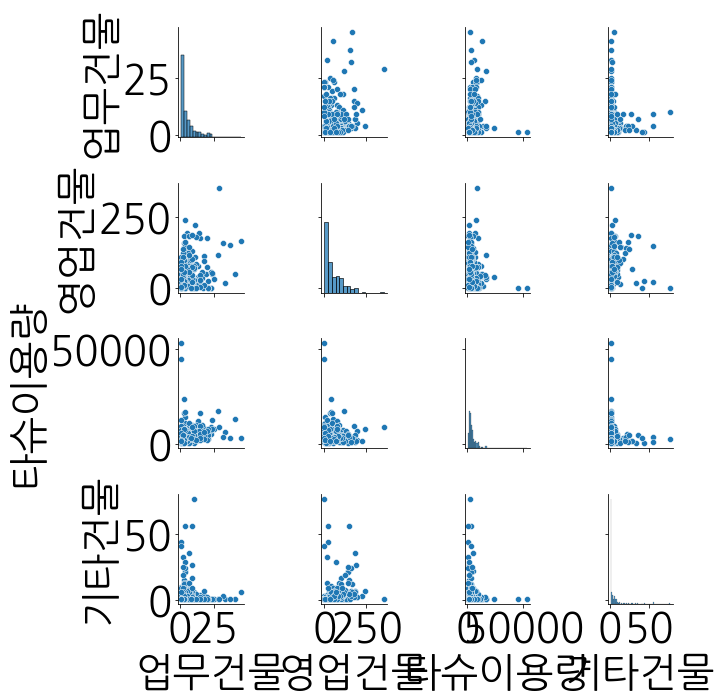

In [134]:
sns.pairplot(df_sample)
plt.show()

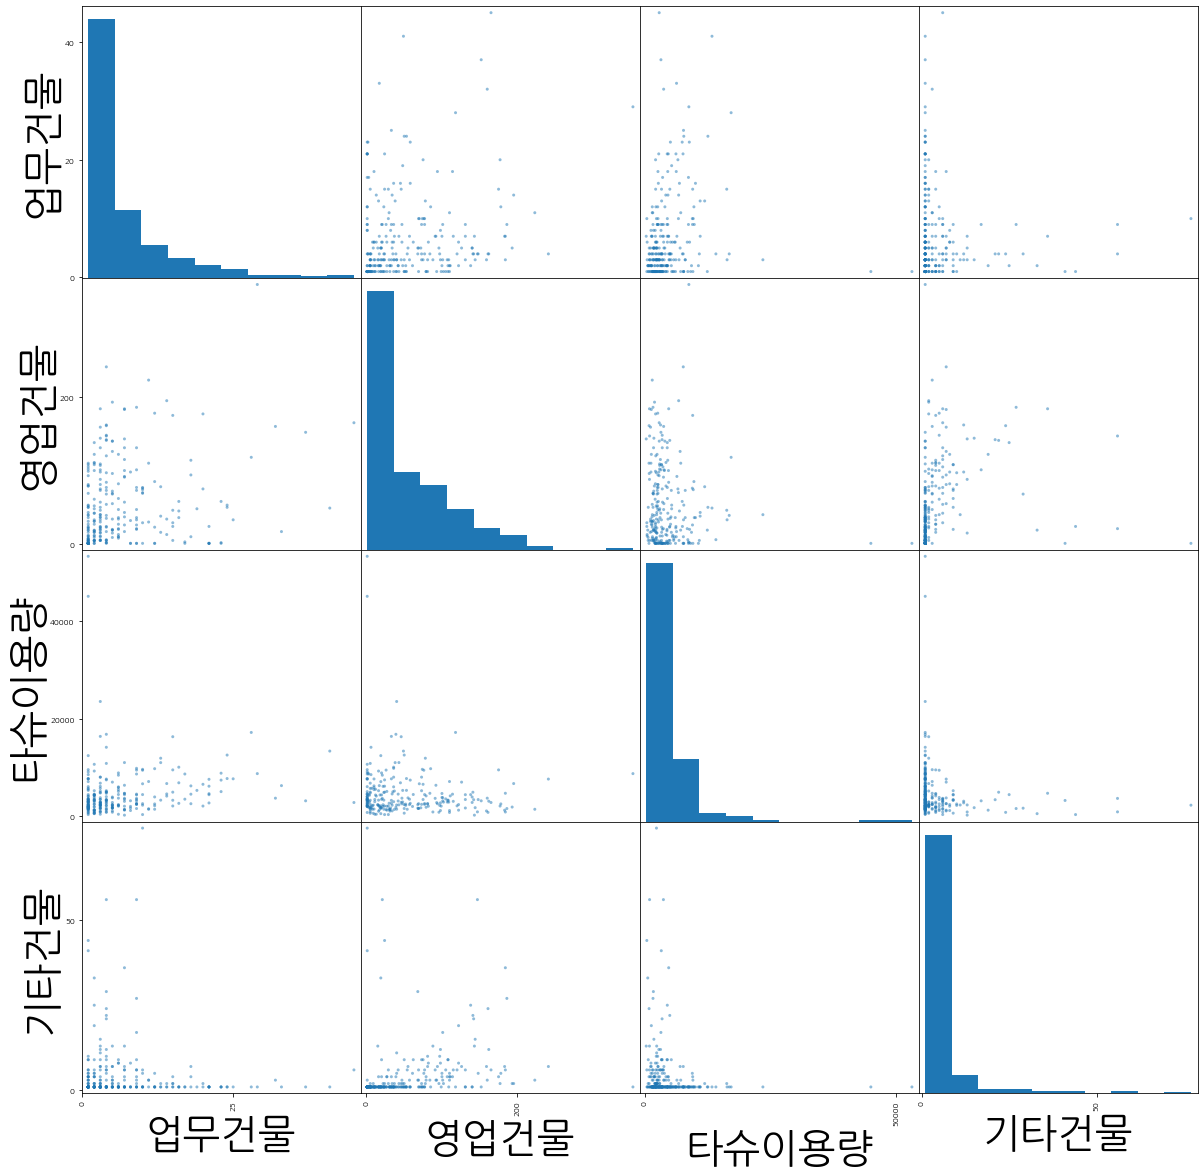

In [135]:
scatter_matrix(df_sample,
              figsize=(20, 20))
plt.rc('font', size=40)
plt.show()

In [136]:
fig = ff.create_scatterplotmatrix(
    df_sample[['업무건물','영업건물','타슈이용량','기타건물']],
    height=800,
    width=800,
    diag='histogram')
iplot(fig)

In [137]:
fig = ff.create_scatterplotmatrix(
    df_sample,
    height=800,
    width=800,
    diag='scatter',
    index='타슈이용량')
iplot(fig)

#sample2 실행

In [138]:
df_sample2 = df.loc[:, ['주거건물','대중집합건물','대전지하철역', '타슈이용량']]

In [139]:
colnames = df_sample2.columns
scaler = MinMaxScaler()
scaler.fit(df_sample2)

MinMaxScaler()

In [140]:
print(scaler.transform(df_sample2))
new_colnames = [i+'_mms' for i in colnames]

[[0.         0.07246377 0.         0.14097283]
 [0.         0.07246377 0.         0.1963982 ]
 [0.         0.10144928 0.         1.        ]
 ...
 [0.09765625 0.         0.         0.07933028]
 [0.01302083 0.         0.         0.03021656]
 [0.04947917 0.01449275 0.         0.02184512]]


In [141]:
pd.concat([df_sample2, pd.DataFrame(scaler.fit_transform(df_sample2[colnames]), columns=new_colnames)], axis=1)

,주거건물,대중집합건물,대전지하철역,타슈이용량,주거건물_mms,대중집합건물_mms,대전지하철역_mms,타슈이용량_mms
0,1,6,0,7727,0.000000,0.072464,0.0,0.140973
1,1,6,0,10660,0.000000,0.072464,0.0,0.196398
2,1,8,0,53185,0.000000,0.101449,0.0,1.000000
3,32,2,0,11007,0.040365,0.014493,0.0,0.202956
4,10,5,0,9109,0.011719,0.057971,0.0,0.167089
...,...,...,...,...,...,...,...,...
257,1,1,0,2199,0.000000,0.000000,0.0,0.036509
258,1,1,0,3210,0.000000,0.000000,0.0,0.055614
259,76,1,0,4465,0.097656,0.000000,0.0,0.079330
260,11,1,0,1866,0.013021,0.000000,0.0,0.030217


In [142]:
df_sample2.dropna(inplace=True)
df_sample2

,주거건물,대중집합건물,대전지하철역,타슈이용량
0,1,6,0,7727
1,1,6,0,10660
2,1,8,0,53185
3,32,2,0,11007
4,10,5,0,9109
...,...,...,...,...
257,1,1,0,2199
258,1,1,0,3210
259,76,1,0,4465
260,11,1,0,1866


In [143]:
df_sample2.cov()

,주거건물,대중집합건물,대전지하철역,타슈이용량
주거건물,28117.491972,364.774297,-2.026761,-1.635270e+05
대중집합건물,364.774297,85.407403,0.255959,1.958616e+03
대전지하철역,-2.026761,0.255959,0.092788,2.174935e+02
타슈이용량,-163526.980697,1958.615952,217.493463,2.679940e+07


#상관분석

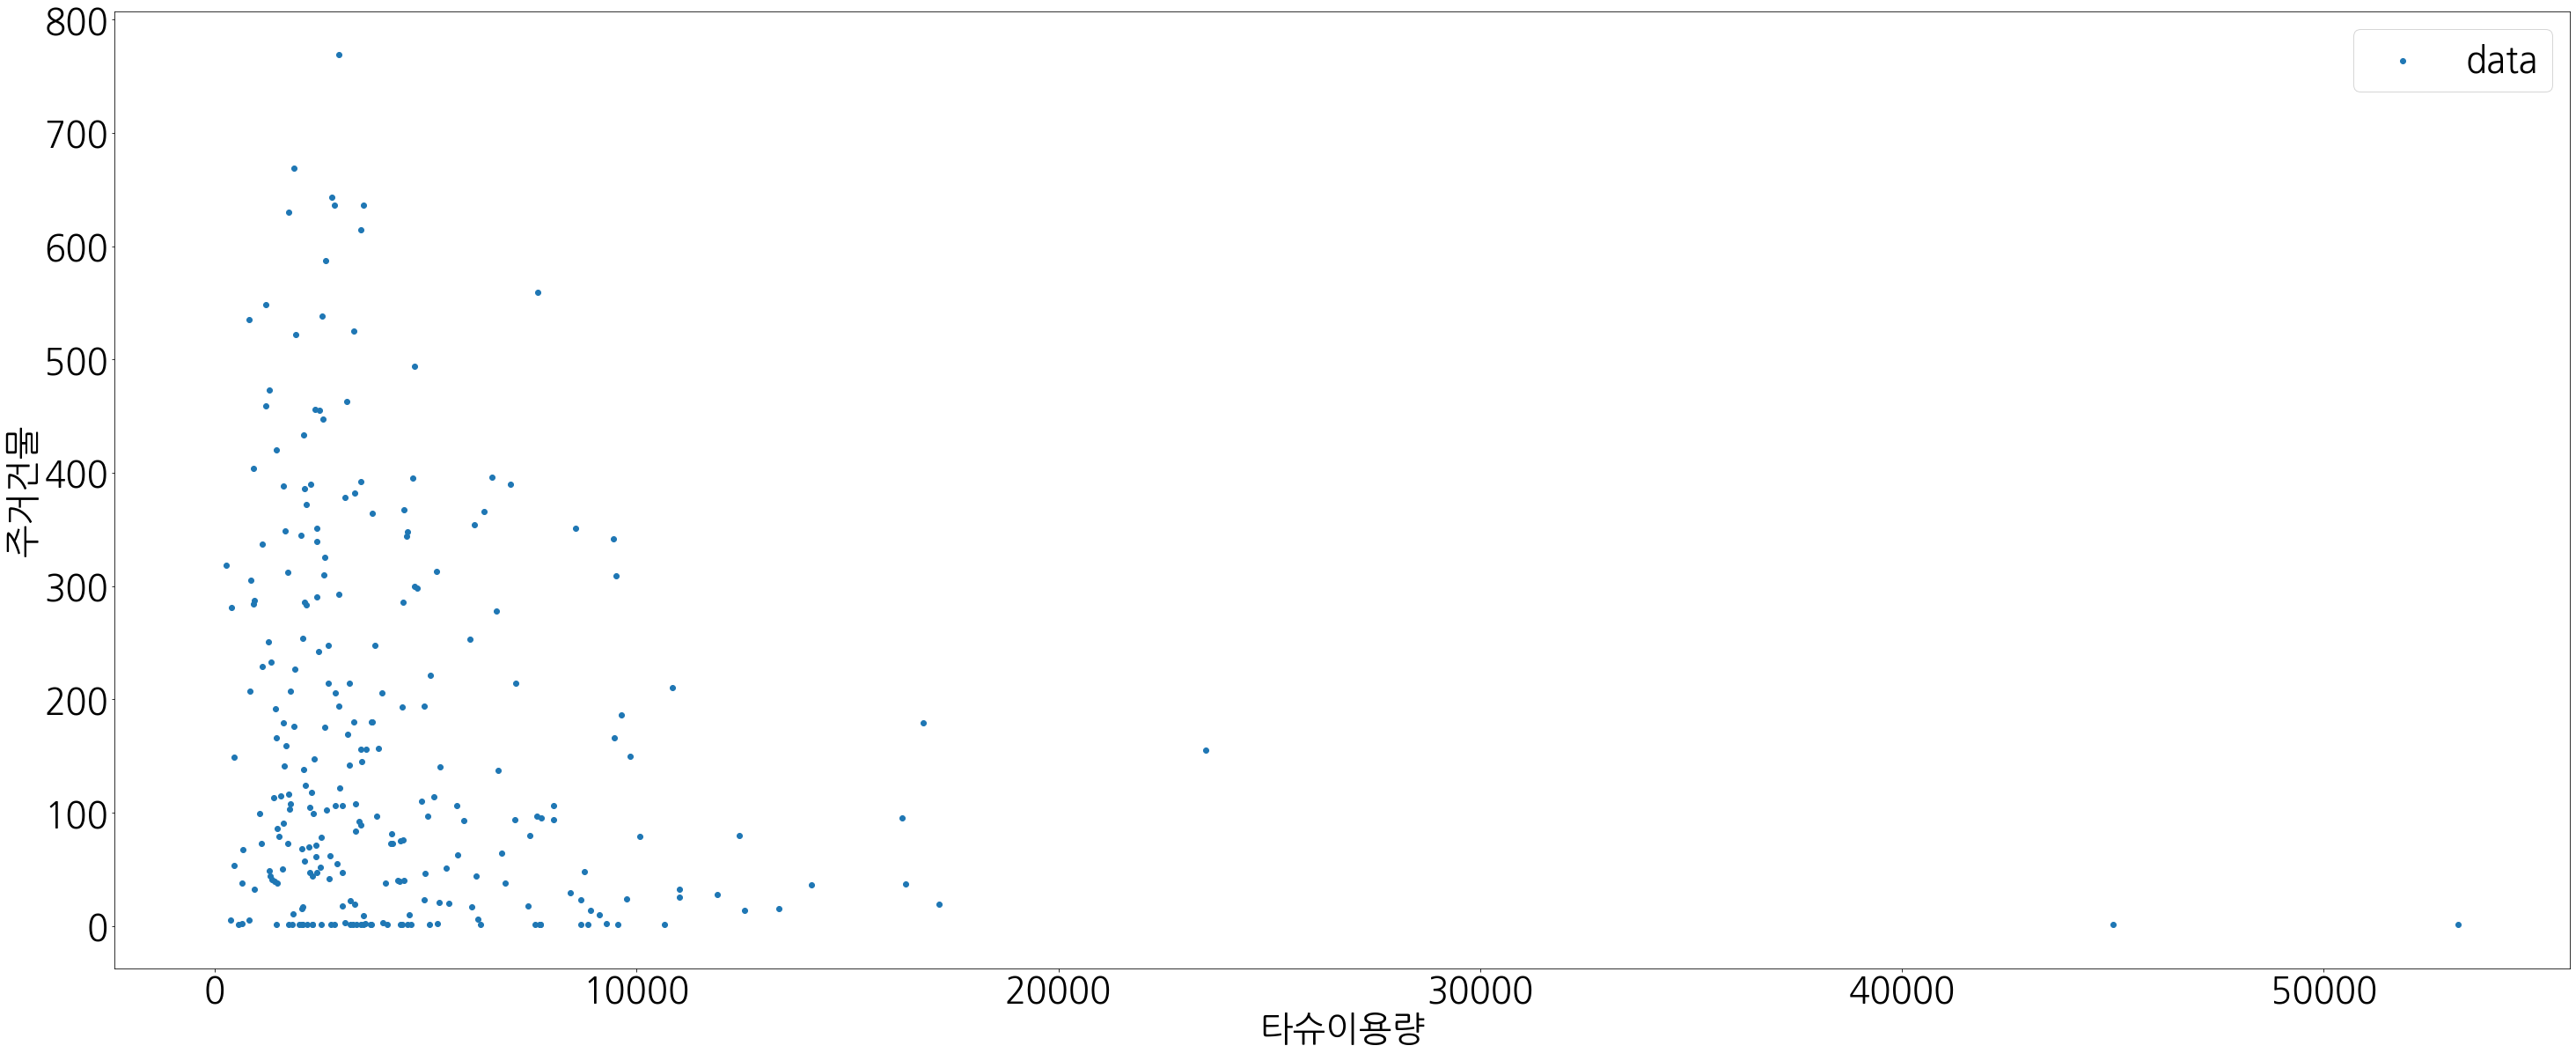

In [144]:
plt.scatter(df_sample2['타슈이용량'], df_sample2['주거건물'], label='data')
plt.legend(loc = "best")
plt.xlabel('타슈이용량')
plt.ylabel('주거건물')
plt.show()

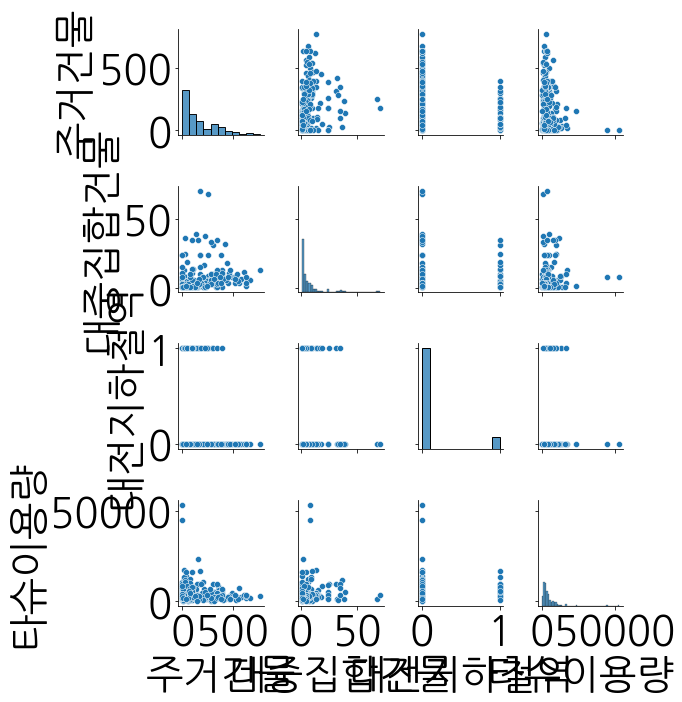

In [145]:
sns.pairplot(df_sample2)
plt.show()

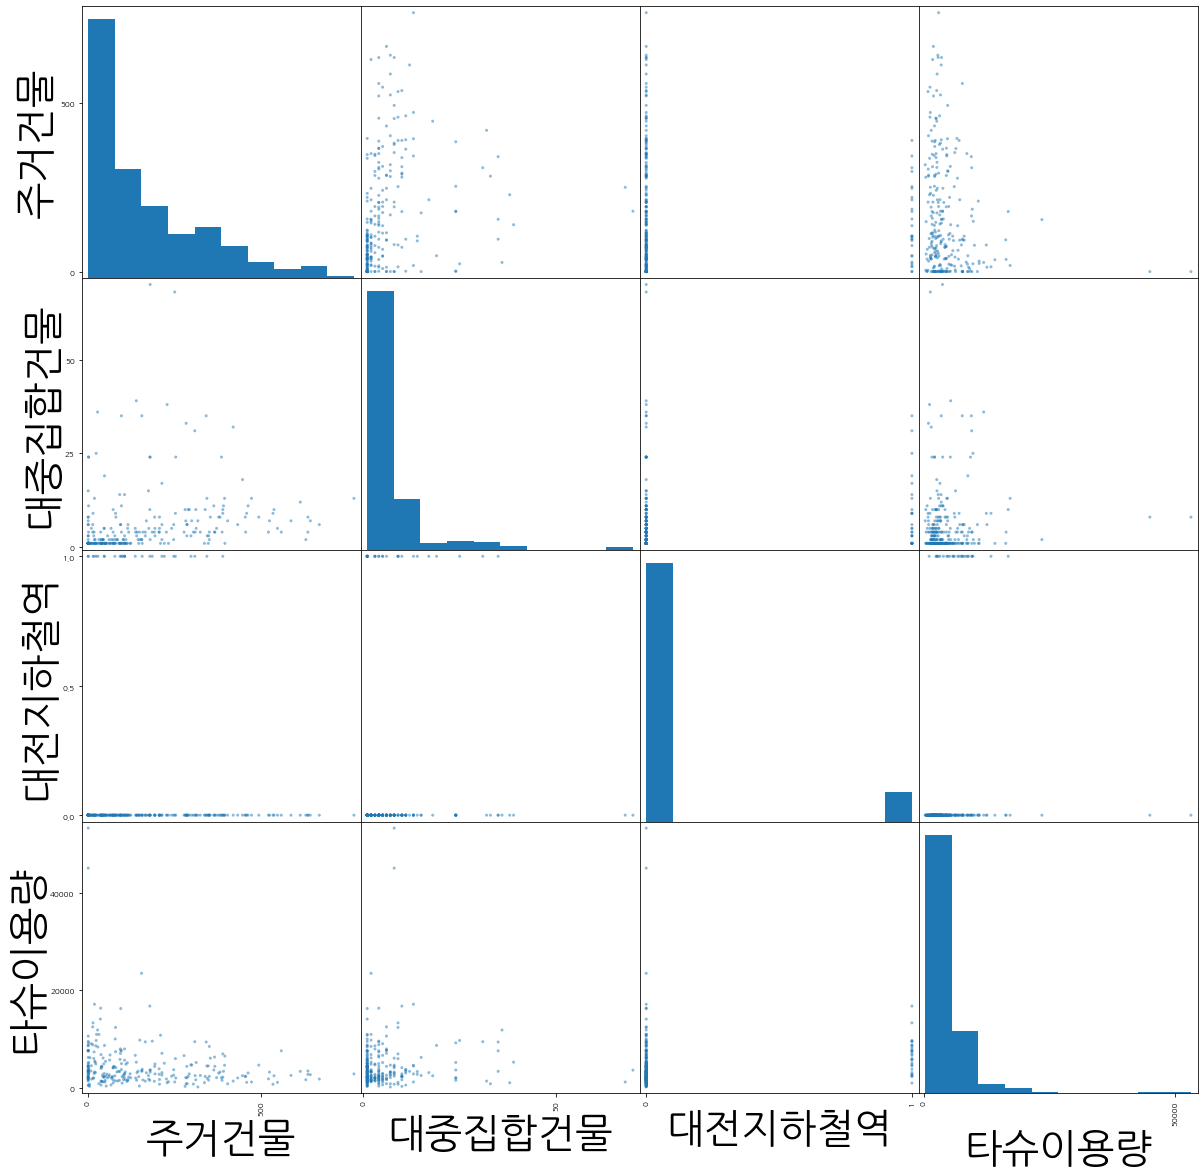

In [146]:
scatter_matrix(df_sample2,
              figsize=(20, 20))
plt.rc('font', size=40)
plt.show()

In [147]:
fig = ff.create_scatterplotmatrix(
    df_sample2[['주거건물','대중집합건물', '대전지하철역', '타슈이용량']],
    height=800,
    width=800,
    diag='histogram')
iplot(fig)

In [148]:
fig = ff.create_scatterplotmatrix(
    df_sample2,
    height=800,
    width=800,
    diag='scatter',
    index='타슈이용량')
iplot(fig)

#sample3 실행

In [149]:
df_sample3 = df.loc[:, ['사고량', '정류장개수', '타슈이용량','총이용승객']]

In [150]:
colnames = df_sample3.columns
scaler = MinMaxScaler()
scaler.fit(df_sample3)

MinMaxScaler()

In [151]:
print(scaler.transform(df_sample3))
new_colnames = [i+'_mms' for i in colnames]

[[0.         0.3125     0.14097283 0.013648  ]
 [0.         0.375      0.1963982  0.0352494 ]
 [0.         0.         1.         0.        ]
 ...
 [0.36842105 0.3125     0.07933028 0.12894195]
 [0.         0.25       0.03021656 0.00213043]
 [0.         0.3125     0.02184512 0.02017248]]


In [152]:
pd.concat([df_sample3, pd.DataFrame(scaler.fit_transform(df_sample3[colnames]), columns=new_colnames)], axis=1)

,사고량,정류장개수,타슈이용량,총이용승객,사고량_mms,정류장개수_mms,타슈이용량_mms,총이용승객_mms
0,0.0,5.0,7727,113755.0,0.000000,0.3125,0.140973,0.013648
1,0.0,6.0,10660,293801.0,0.000000,0.3750,0.196398,0.035249
2,0.0,0.0,53185,0.0,0.000000,0.0000,1.000000,0.000000
3,0.0,2.0,11007,1862557.0,0.000000,0.1250,0.202956,0.223464
4,0.0,2.0,9109,87367.0,0.000000,0.1250,0.167089,0.010482
...,...,...,...,...,...,...,...,...
257,0.0,2.0,2199,131031.0,0.000000,0.1250,0.036509,0.015721
258,0.0,2.0,3210,323753.0,0.000000,0.1250,0.055614,0.038843
259,7.0,5.0,4465,1074721.0,0.368421,0.3125,0.079330,0.128942
260,0.0,4.0,1866,17757.0,0.000000,0.2500,0.030217,0.002130


In [153]:
df_sample3.dropna(inplace=True)
df_sample3

,사고량,정류장개수,타슈이용량,총이용승객
0,0.0,5.0,7727,113755.0
1,0.0,6.0,10660,293801.0
2,0.0,0.0,53185,0.0
3,0.0,2.0,11007,1862557.0
4,0.0,2.0,9109,87367.0
...,...,...,...,...
257,0.0,2.0,2199,131031.0
258,0.0,2.0,3210,323753.0
259,7.0,5.0,4465,1074721.0
260,0.0,4.0,1866,17757.0


In [154]:
df_sample3.cov()

,사고량,정류장개수,타슈이용량,총이용승객
사고량,6.369220,1.822760e+00,1.465308e+03,9.133064e+05
정류장개수,1.822760,6.702173e+00,-1.006010e+03,1.523288e+06
타슈이용량,1465.308385,-1.006010e+03,2.679940e+07,1.079522e+09
총이용승객,913306.429470,1.523288e+06,1.079522e+09,1.319863e+12


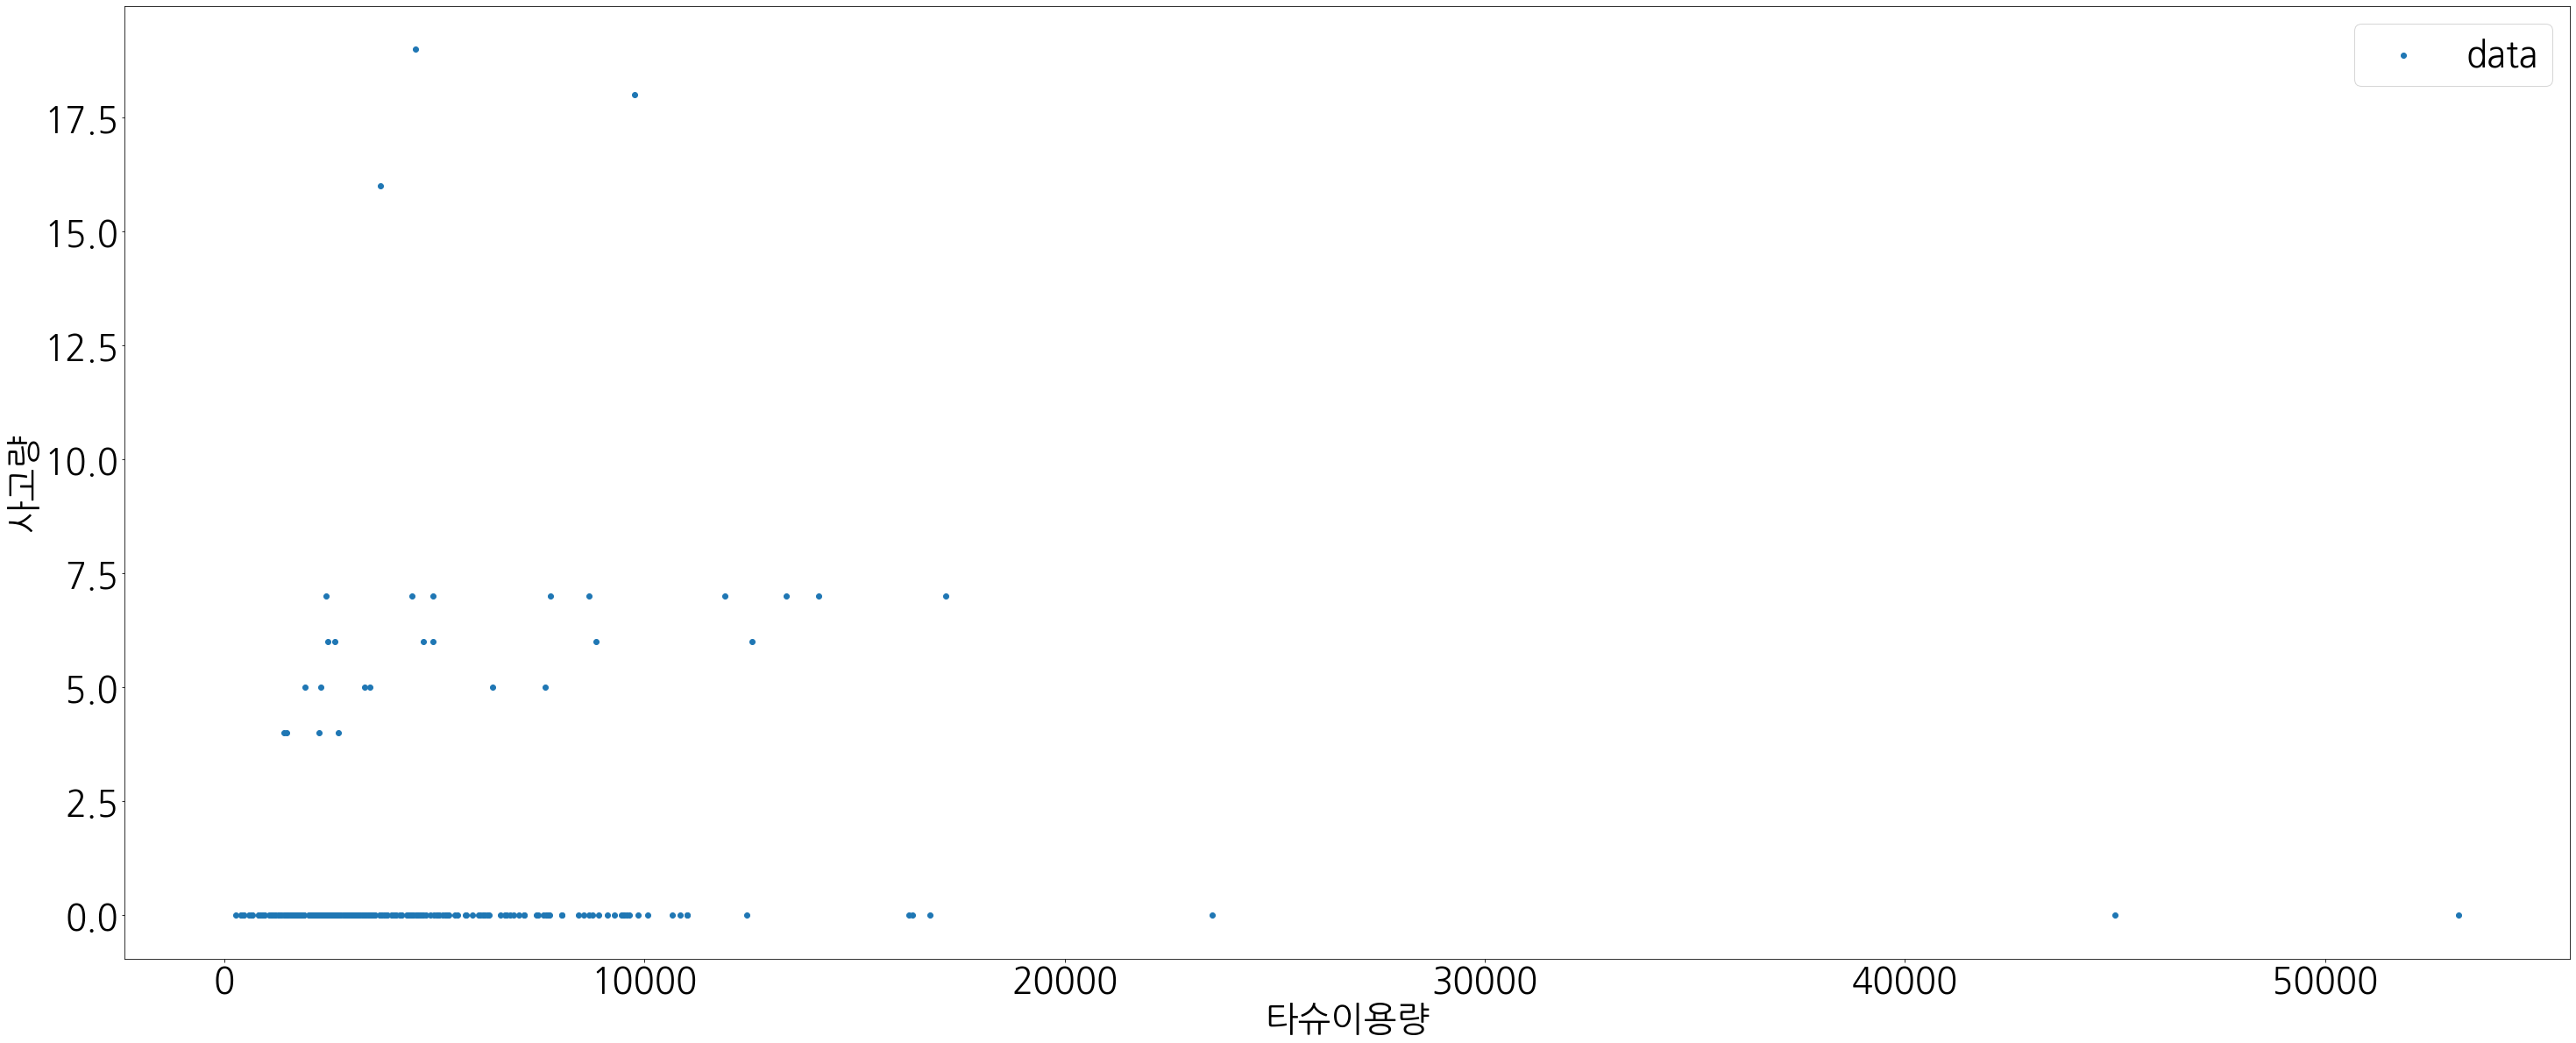

In [155]:
plt.scatter(df_sample3['타슈이용량'], df_sample3['사고량'], label='data')
plt.legend(loc = "best")
plt.xlabel('타슈이용량')
plt.ylabel('사고량')
plt.show()

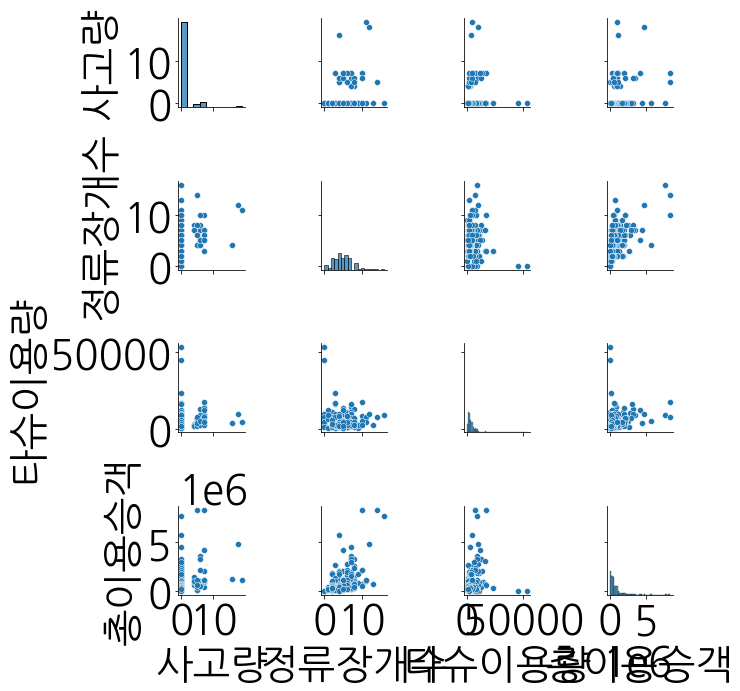

In [156]:
sns.pairplot(df_sample3)
plt.rcParams["figure.figsize"] = (20, 20)
plt.show()

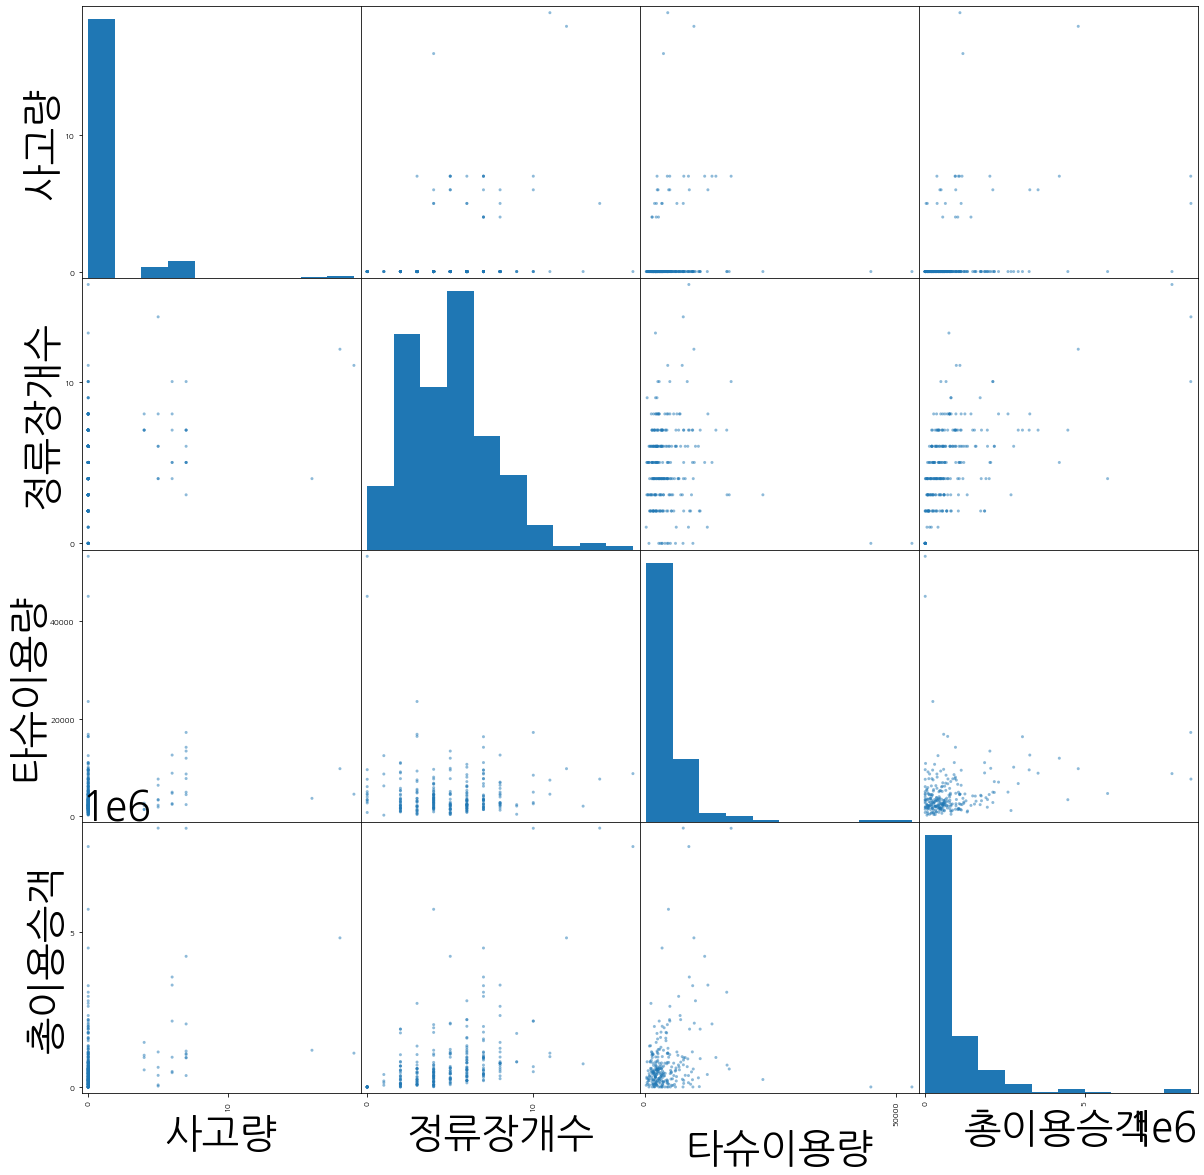

In [157]:
scatter_matrix(df_sample3,
              figsize=(20, 20))
plt.rc('font', size=40)
plt.show()

In [158]:
fig = ff.create_scatterplotmatrix(
    df_sample3[['사고량', '정류장개수', '타슈이용량','총이용승객']],
    height=800,
    width=800,
    diag='histogram')
iplot(fig)

In [159]:
fig = ff.create_scatterplotmatrix(
    df_sample3,
    height=800,
    width=800,
    diag='scatter',
    index='타슈이용량')
iplot(fig)

In [ ]:
#임시VIF 계산

In [28]:
X = df_sample.drop(["기타건물","타슈이용량"], axis=1)

In [29]:
X

,업무건물,영업건물,주거건물,대중집합건물,대전지하철역,사고량,정류장개수,총이용승객
0,1,1,1,6,0,0.0,5.0,113755.0
1,2,1,1,6,0,0.0,6.0,293801.0
2,1,1,1,8,0,0.0,0.0,0.0
3,13,38,32,2,0,0.0,2.0,1862557.0
4,1,1,10,5,0,0.0,2.0,87367.0
...,...,...,...,...,...,...,...,...
257,12,1,1,1,0,0.0,2.0,131031.0
258,8,1,1,1,0,0.0,2.0,323753.0
259,2,138,76,1,0,7.0,5.0,1074721.0
260,1,5,11,1,0,0.0,4.0,17757.0


In [30]:
#import numpy as np
#from patsy import dmatrices
#import statsmodels.api as sm;
from statsmodels.stats.outliers_influence import variance_inflation_factor
#%matplotlib inline

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['feature'] = X.columns
df = vif.round(1)
df.set_index(['feature'], inplace=True)
df.transpose()

feature,업무건물,영업건물,주거건물,대중집합건물,대전지하철역,사고량,정류장개수,총이용승객
VIF Factor,2.0,4.6,2.6,2.2,1.3,1.3,3.7,2.6
